# 神经网络：分类

1. 导入全局模块

In [1]:
import torch
from matplotlib import pyplot
from torch.nn import Linear
from torch.nn import Module
from matplotlib.animation import FuncAnimation
import pandas

2. 随机产生训练集

In [2]:
# 生成一个 100R×2C 的二维基准张量
plot_base = torch.ones(100, 2)
# 以点(3, 3)为中心、坐标标准差为1，生成类别A的散点坐标集
x_A = torch.normal(3 * plot_base, 1)
# 为类别A贴上标签0
y_A = torch.zeros(100)
# 以点(-3, -3)为中心、坐标标准差为1，生成类别B的散点坐标集
x_B = torch.normal(-3 * plot_base, 1)
# 为类别B贴上标签1
y_B = torch.ones(100)
# 将2组坐标按列合并为一个 200R×2C 32位浮点训练集
x = torch.cat((x_A, x_B)).type(torch.FloatTensor)
# 将标签也同样地进行合并，并转换为64位整型训练集
y = torch.cat((y_A, y_B)).type(torch.LongTensor)
table = pandas.DataFrame({
    'X': x.data.numpy()[:, 0],
    'Y': x.data.numpy()[:, 1],
    'Class': y.data.numpy()
})
table.style

,X,Y,Class
0,2.9832,2.93677,0
1,4.11719,2.66959,0
2,0.847605,4.1517,0
3,2.92281,2.36612,0
4,2.04034,3.97877,0
5,2.97539,5.80382,0
6,2.49596,5.79918,0
7,2.22701,3.32005,0
8,2.70447,4.25844,0
9,1.1569,2.28734,0


3. 创建神经网络模型

In [3]:
class Classification(Module):
    """ 神经网络分类模型 """

    def __init__(self, in_nodes, hidden_nodes, out_nodes):
        """ 构造函数 """
        super(Classification, self).__init__()
        # 定义输入层与隐含层的全连接形式
        self.to_hidden = Linear(in_nodes, hidden_nodes)
        # 定义隐含层与输出层的全连接形式
        self.to_out = Linear(hidden_nodes, out_nodes)

    def forward(self, pulse):
        """ # 前向传播算法 #

            由于每种分类的可能性只有0～1，
            我们选择采用Sigmoid函数对神经冲动进行压缩
        """
        pulse = torch.sigmoid(self.to_hidden(pulse))
        pulse = torch.sigmoid(self.to_out(pulse))
        return pulse

4. 实例化模型

In [4]:
# 2个输入神经元，单层10个隐含神经元，2个输出神经元
model = Classification(2, 10, 2)
model

Classification(
  (to_hidden): Linear(in_features=2, out_features=10, bias=True)
  (to_out): Linear(in_features=10, out_features=2, bias=True)
)

5. 定义参数优化器和损失函数

In [5]:
# 使用 随机梯度下降 进行参数优化，并指定 学习率（超参数）
optimizer = torch.optim.SGD(model.parameters(), lr=10)
# 使用 交叉熵 作为损失函数
loss_function = torch.nn.CrossEntropyLoss()

6. 展示初始分类结果

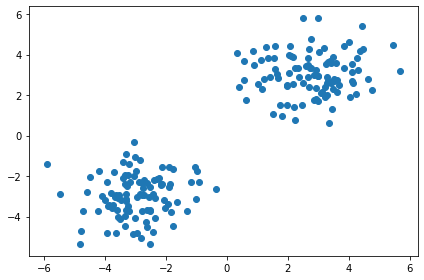

In [6]:
# 生成空白画布
(figure, axes) = pyplot.subplots()
# 自动调整图表到最佳状态
figure.set_tight_layout(True)
# 获取屏幕分辨率
screen_dpi = figure.get_dpi()
# 绘制散点图
axes.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1])

7. 执行训练，指定超参数 训练次数 为100。

In [7]:
for i in range(10):
    # 获得模型输出
    out = model.forward(x)
    # 计算损失度
    loss = loss_function(out, y)

    # 梯度归零
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 执行优化
    optimizer.step()

8. 输出分类结果

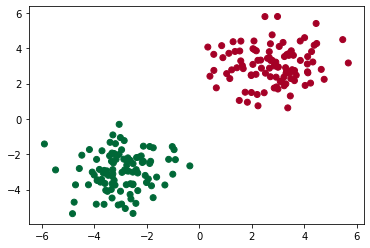

In [8]:
prediction = torch.max(out, 1)[1]
pred_y = prediction.data.numpy().squeeze()
target_y = y.data.numpy()
pyplot.scatter(
    x.data.numpy()[:, 0],
    x.data.numpy()[:, 1],
    c=pred_y,
    cmap='RdYlGn'
)

9. 获得训练各连结权重和激发下限

In [9]:
for (name, value) in model.named_parameters():
    print(name, value, sep='\n', end='\n\n')

to_hidden.weight
Parameter containing:
tensor([[ 0.8890,  0.5759],
        [ 1.1740,  0.1316],
        [-0.8917, -0.4116],
        [ 0.7306,  0.0970],
        [ 0.8253,  0.1860],
        [-0.5709, -0.9166],
        [-0.6986, -0.7269],
        [-0.8305, -0.8563],
        [-0.7788, -0.4864],
        [ 0.5186,  0.6486]], requires_grad=True)

to_hidden.bias
Parameter containing:
tensor([-0.5625, -0.5200, -0.2165,  0.4369,  0.6011, -0.2601, -0.1884,  0.5017,
         0.3908,  0.1243], requires_grad=True)

to_out.weight
Parameter containing:
tensor([[ 1.2563,  0.7864, -0.6953,  0.4898,  0.7651, -1.3001, -1.0771, -0.9420,
         -0.8040,  0.9303],
        [-1.0509, -0.9950,  0.9605, -0.5859, -0.6111,  0.9879,  1.0349,  1.2685,
          0.6501, -0.9040]], requires_grad=True)

to_out.bias
Parameter containing:
tensor([ 0.2617, -0.3544], requires_grad=True)



9. 获得分类概率

In [10]:
pandas.DataFrame(out.data.numpy(), columns=['X', 'Y']).style

,X,Y
0,0.984797,0.0150594
1,0.986322,0.0135045
2,0.975254,0.025665
3,0.983684,0.0161292
4,0.98345,0.0165946
5,0.986578,0.0133456
6,0.986044,0.0139311
7,0.98302,0.0169489
8,0.985531,0.0144001
9,0.964947,0.0356313


10. 测试分类效果

In [11]:
table = pandas.DataFrame({'X': [3.14, -3.14], 'Y': [2.72, -2.72]})
table['Class'] = torch.max(
    model.forward(torch.Tensor(table.to_numpy())), 1
)[1]
table.style

,X,Y,Class
0,3.14,2.72,0
1,-3.14,-2.72,1
